In [26]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg

<IPython.core.display.Javascript object>

In [33]:
harmonic_oscillator = lambda x, y, w=1: 0.5 * w**2 * (x**2 + y**2)
abs_dw = lambda x, y, w=1, R=2: 0.5 * w**2 * (
    x**2 + y**2
) + 0.5 * w**2 * (0.25 * R**2 - R * abs(x))
smooth_dw = (
    lambda x, y, w=1, a=1: 0.5
    * w**2
    * (1.0 / (4.0 * a**2) * (x**2 - a**2) ** 2 + y**2)
)

<IPython.core.display.Javascript object>

In [34]:
# Define grid parameters
N = 60
Lx = 5
x = np.linspace(-Lx, Lx, N + 2)
y = np.linspace(-Lx, Lx, N + 2)
V = np.zeros((N, N))
delta_x = x[1] - x[0]
w = 1
R = 1.5

X, Y = np.meshgrid(x[1 : N + 1], y[1 : N + 1])
# V = smooth_dw(X, Y, w, R)
V = harmonic_oscillator(X, Y, w)
V = V.T

<IPython.core.display.Javascript object>

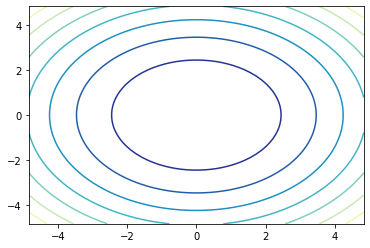

<IPython.core.display.Javascript object>

In [35]:
plt.figure()
plt.contour(X, Y, V, cmap="YlGnBu_r")
plt.show()

In [36]:
# Setup 2-dimensional second derivative matrix
n = N**2
a = 0.5

h_diag = a * 4 * np.ones(n) / (delta_x**2) + V.flatten("F")
h_off = -a * np.ones(n - 1) / (delta_x**2)
h_off_off = -a * np.ones(n - N) / (delta_x**2)

k = 1
for i in range(1, n - 1):
    if i % N == 0:
        h_off[i - 1] = 0

h = scipy.sparse.diags(
    [h_diag, h_off, h_off, h_off_off, h_off_off], offsets=[0, -1, 1, -N, N]
)
h = h.todense()
epsilon, phi = np.linalg.eigh(h)
n_eig_vals = 10
print("n first eigenvalues ", epsilon[0:n_eig_vals])

n first eigenvalues  [0.99831751 1.99494682 1.99494682 2.98819112 2.98819112 2.99157612
 3.97803393 3.97803393 3.98482042 3.98482042]


<IPython.core.display.Javascript object>

In [37]:
# Plot some eigenstates
phi = np.array(phi)

phi0 = phi[:, 0].real
phi1 = phi[:, 1].real
phi2 = phi[:, 2].real

phi0 = phi0.reshape(N, N)
phi1 = phi1.reshape(N, N)
phi2 = phi2.reshape(N, N)

<IPython.core.display.Javascript object>

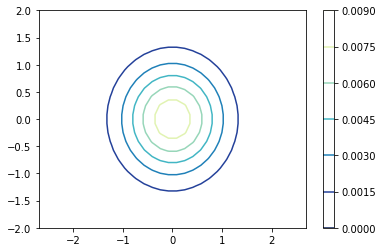

<IPython.core.display.Javascript object>

In [38]:
plt.figure()
plt.contour(X, Y, abs(phi0) ** 2, cmap="YlGnBu_r")
plt.colorbar()
plt.xlim(-2.7, 2.7)
plt.ylim(-2, 2)
plt.show()

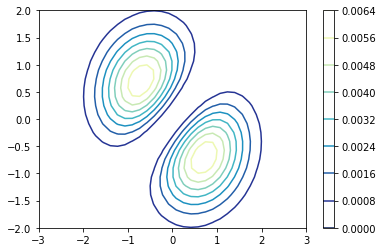

<IPython.core.display.Javascript object>

In [39]:
plt.figure()
plt.contour(X, Y, abs(phi1) ** 2, cmap="YlGnBu_r")
plt.colorbar()
plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.show()

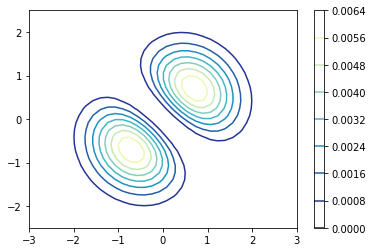

<IPython.core.display.Javascript object>

In [40]:
plt.figure()
plt.contour(X, Y, abs(phi2) ** 2, cmap="YlGnBu_r")
plt.colorbar()
plt.xlim(-3, 3)
plt.ylim(-2.5, 2.5)
plt.show()